In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Load the dataset
file_path = r'c:\Data\american_bankruptcy.xlsx'
df = pd.read_excel(file_path)

# Step 2: Recode the 'status_label' so that only the last observation in a panel is 'failed'
# Sort the dataset by company_name and year to ensure the panel is correctly ordered
df = df.sort_values(by=['company_name', 'year'])

# Identify the last observation for each panel
df['is_last'] = df.groupby('company_name')['year'].transform('max') == df['year']

# Recode 'status_label' based on whether it's the last observation
df['status_label'] = df.apply(lambda row: 'failed' if row['is_last'] else 'alive', axis=1)

# Step 3: Convert 'status_label' into a boolean called 'bankrupt'
df['bankrupt'] = df['status_label'].map({'alive': 0, 'failed': 1})

# Drop the 'is_last' and 'status_label' columns if no longer needed
df = df.drop(columns=['is_last', 'status_label'])

In [20]:
print(df.describe())

               year             X1             X2            X3            X4  \
count  78682.000000   78682.000000   78682.000000  78682.000000  78682.000000   
mean    2007.506317     880.362485    1594.529029    121.234256    376.759424   
std        5.742768    3928.564794    8930.484664    652.376804   2012.023142   
min     1999.000000      -7.760000    -366.645000      0.000000 -21913.000000   
25%     2002.000000      18.924000      17.038250      1.192000     -0.811000   
50%     2007.000000     100.449500     103.661000      7.929500     15.034500   
75%     2012.000000     431.526750     634.548000     47.971750    139.655250   
max     2018.000000  169662.000000  374623.000000  28430.000000  81730.000000   

                 X5             X6            X7            X8             X9  \
count  78682.000000   78682.000000  78682.000000  7.868200e+04   78682.000000   
mean     201.605717     129.382453    286.832743  3.414355e+03    2364.019706   
std     1060.766096    1265

In [17]:
# Step 4: Prepare data for LDA and QDA
# Assuming variables X1-X18 are the feature columns
X = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18']]
y = df['bankrupt']

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Perform LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)
y_pred_lda = lda.predict(X)

# Evaluate LDA performance
lda_accuracy = accuracy_score(y, y_pred_lda)
print(f'LDA Accuracy: {lda_accuracy:.2f}')

# Step 6: Perform QDA
qda = QuadraticDiscriminantAnalysis()
qda.fit(X, y)
y_pred_qda = qda.predict(X)

# Evaluate QDA performance
qda_accuracy = accuracy_score(y, y_pred_qda)
print(f'QDA Accuracy: {qda_accuracy:.2f}')

LDA Accuracy: 0.89
QDA Accuracy: 0.14


C:\Users\esiemsen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


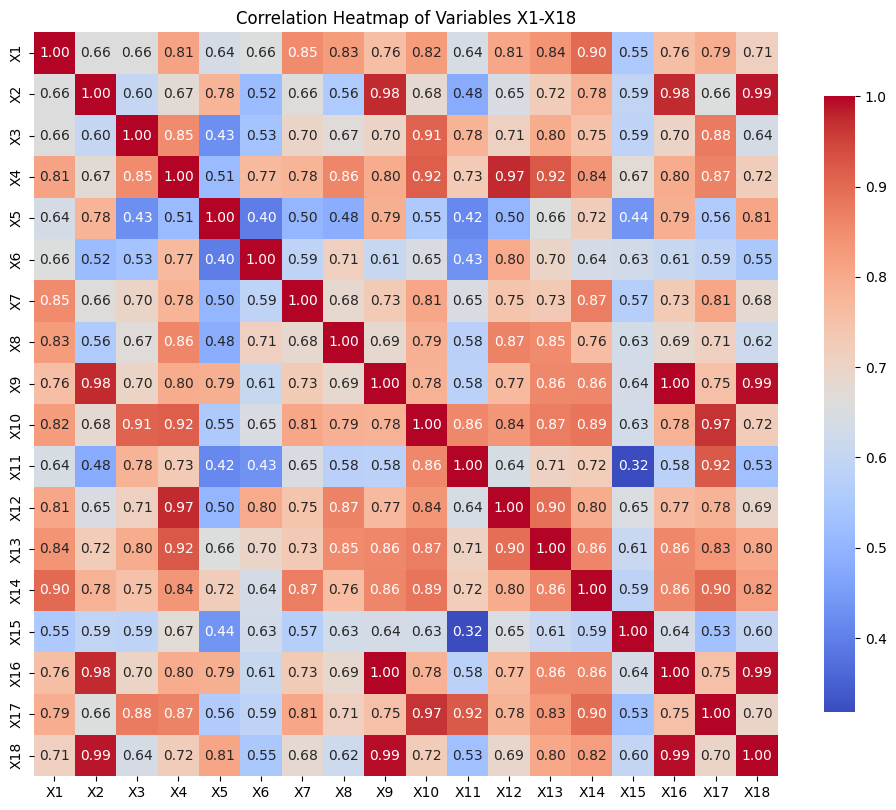

In [22]:
# Calculate the correlation matrix
corr_matrix = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 
                  'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18']].corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={'shrink': .8})

# Customize the plot
plt.title('Correlation Heatmap of Variables X1-X18')
plt.show()